# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**: MacKenzie Fountain

**ID**: 5362163

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [94]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE 4750/hw2-mdf226`


In [95]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

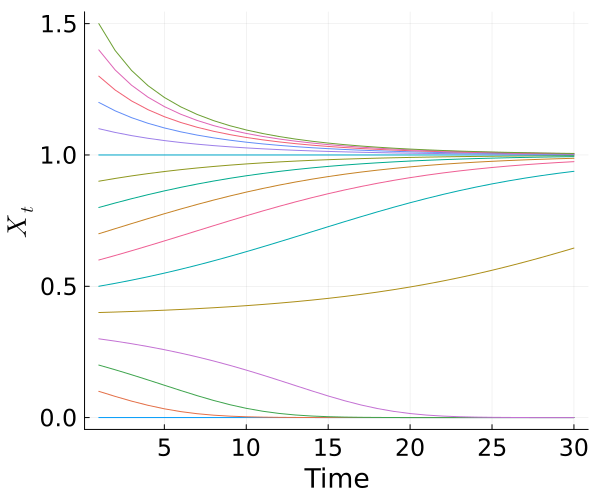

In [96]:
# define functions for lake recycling and outflows
lake_P_cycling(x, q) = x.^q ./ (1 .+ x.^q);
lake_P_out(x, b) = b .* x;

T = 30
X_vals = collect(0.0:0.1:1.5)
function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t].+ lake_P_cycling(X[t-1], q) .- lake_P_out(X[t-1], b)
    end
    return X
end
X = map(x -> simulate_lake_P(x, T, 0.5, 1.5, zeros(T), zeros(T)), X_vals)
p_noinflow = plot(X, label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500))

In [97]:
# Import the Roots package
using Roots

# Define functions for lake recycling and outflows
lake_P_cycling(x, q) = x^q / (1 + x^q)
lake_P_out(x, b) = b * x

# Define the X_delta function (for root finding)
X_delta(x, a, b, q) = a + lake_P_cycling(x, q) - lake_P_out(x, b)
#ChatGPT was used to correct the formatting of the equation above

# Find the root using the `find_zero` function
root = find_zero(x -> X_delta(x, 0.0, 0.5, 1.5), 0.5)
println("Root found: ", root)

Root found: 0.3819660112501051


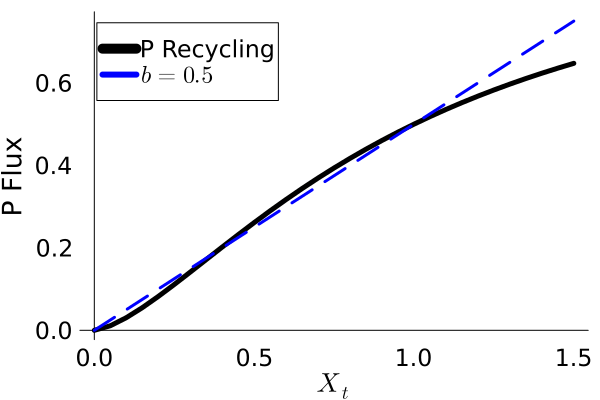

In [98]:
# Define functions for lake recycling and outflows
lake_P_cycling(x, q) = x .^ q ./ (1 .+ x .^ q)   
lake_P_out(x, b) = b .* x                         

# Define range of lake states X
x = 0:0.05:1.5

# Plot recycling and outflows for selected values of b and q
p1 = plot(x, lake_P_cycling(x, 1.5), color=:black, linewidth=5, legend=:topleft, 
          label="P Recycling", ylabel="P Flux", xlabel=L"$X_t$", tickfontsize=16, 
          guidefontsize=18, legendfontsize=16, palette=:tol_muted, framestyle=:zerolines, grid=false)

# Plot the outflow with b=0.5
plot!(x, lake_P_out(x, 0.5), linewidth=3, linestyle=:dash, label=L"$b=0.5$", color=:blue)

#ChatGPT was used to debug this section due to a method matching error


### Reflection 1

The equlibira of the system are approximately 0.2 and 0.5.
The resilience of this system is low becuase it has roots that are small (in value), this means a smaller disturbance can trigger a bigger response.

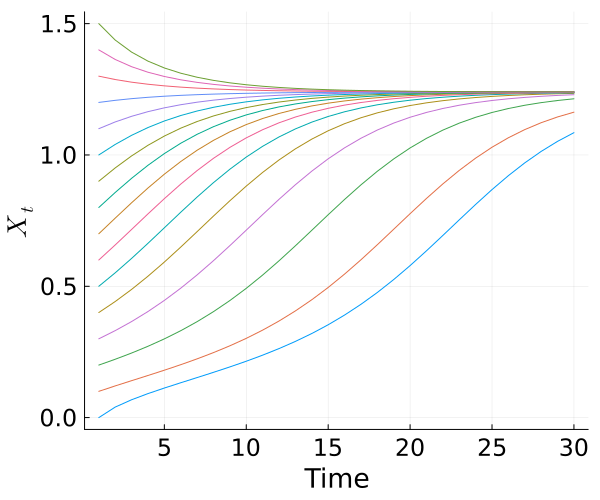

In [99]:
# Define functions for lake recycling and outflows
lake_P_cycling(x, q) = x^q / (1 + x^q)
lake_P_out(x, b) = b * x

T = 30
X_vals = collect(0.0:0.1:1.5)

# Simulate lake phosphorus dynamics
function simulate_lake_P(X_ic, T, b, q, a, y)
    m = fill(a, T)  # Array of size T filled with value `a`
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] + m[t] + y[t] + lake_P_cycling(X[t-1], q) - lake_P_out(X[t-1], b)
    end
    return X
end
#ChatGPT was used to debug this section due to a method matching error; orignal idea to implement a 
#for loop to create a matrix for a=0.02 was from M. Fountain


# Array for y values
y_vals = fill(0.02, T)

# Simulate the lake phosphorus model for different initial conditions in `X_vals`
X = map(x -> simulate_lake_P(x, T, 0.5, 1.5, 0.02, y_vals), X_vals)

# Plot the results
m_noinflow = plot(X, label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500))
display(m_noinflow)


In [100]:
# Find the root using the `find_zero` function
root2 = find_zero(x -> X_delta(x, 0.05, 0.5, 1.5), 1.2)
println("Root found: ", root2)

Root found: 1.287019413558788


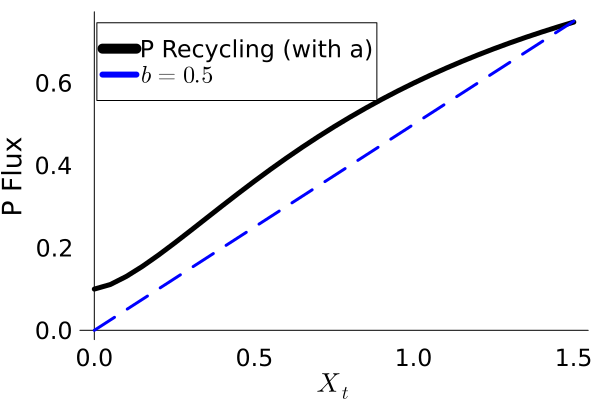

In [102]:
# Define functions for lake recycling and outflows, with `a` affecting cycling
lake_P_cycling(x, q, a) = (x .^ q ./ (1 .+ x .^ q)) .+ a
lake_P_out(x, b) = b .* x

# Define range of lake states X
x = 0:0.05:1.5

# Plot recycling and outflows for selected values of b and q, with `a` affecting recycling
p1 = plot(x, lake_P_cycling(x, 1.5, 0.1), color=:black, linewidth=5, legend=:topleft, 
          label="P Recycling (with a)", ylabel="P Flux", xlabel=L"$X_t$", tickfontsize=16, 
          guidefontsize=18, legendfontsize=16, palette=:tol_muted, framestyle=:zerolines, grid=false)

# Plot the outflow with b=0.5
plot!(x, lake_P_out(x, 0.5), linewidth=3, linestyle=:dash, label=L"$b=0.5$", color=:blue)

### Reflection 2

The equilibia of this system is approximately 0.8
The unstable equilibrium has dropped so there was a steeper drop which means its more resilient than the previous scenerio.

## References

 - System Dynamics Lecture
 - Chat GPT (debugging; referances included)